##  Building a small convolutional network for MNIST
In the MNIST digit-classification example, anything that achieves an accuracy greater than 0.1 can be said to have statistical power; However, we would like to create a powerful model that performs better than the baseline.

#### When using a CNN, **the four important hyperparameters we have to decide on are:**
1. The kernel size (size of a weight matrix);
2. The filter count (that is, how many filters do we want to use);
3. The stride (how big are the steps of the filter);
4. The padding;

In [8]:
from keras import layers
from keras import models
from keras.datasets import mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [9]:
model = models.Sequential()
model.add(layers.Conv2D(filters= 32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1))) #(image_height, image_width, image_channels) (not including the batch dimension).
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(filters = 64, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(filters = 64, kernel_size=(3, 3), activation='relu'))

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


### Why in the first layer we get 320 parameters?
Answer: Filters*kernel_size+bias

### The next step is to feed the last output tensor (of shape (3, 3, 64)) into a densely connected classifier network like: Dense layer. This classifier processes vectors, which are 1D, whereas the current output is a 3D tensor. First we have to flatten the 3D outputs to 1D, and then add a few Dense layers on top.

In [11]:
model.add(layers.Flatten()) # Output_shape=(None, 3*3*64)
model.add(layers.Dense(units= 64, activation='relu'))
model.add(layers.Dense(units=10, activation='softmax'))

In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                36928     
__________

In [13]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels) #Converts a class vector (integers) to binary class matrix.
test_labels = to_categorical(test_labels)

In [14]:
X_train = train_images[:6000, :, :]
X_train_labels = train_labels[:6000, :]

X_valid = train_images[6000:7000, :, :]
X_valid_labels= train_labels[6000:7000, :]

X_test = test_images[:1000, :, :]
X_test_labels = test_labels[:1000, :]

In [15]:
print(X_train.shape)

(6000, 28, 28, 1)


In [35]:
print(X_train_labels.shape)

(6000, 10)


In [46]:
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
history = model.fit(X_train, X_train_labels, epochs=10, batch_size=64, validation_data=(X_valid, X_valid_labels))

Train on 6000 samples, validate on 1000 samples
Epoch 1/10
6000/6000 [==============================] - 9s 1ms/step - loss: 0.2022 - acc: 0.9407 - val_loss: 0.0993 - val_acc: 0.9720

In [47]:
test_loss, test_acc = model.evaluate(X_test, X_test_labels)
test_acc

1000/1000 [==============================] - 0s 473us/step


0.982

In [48]:
model.save('small_convnet_mnist.h5')

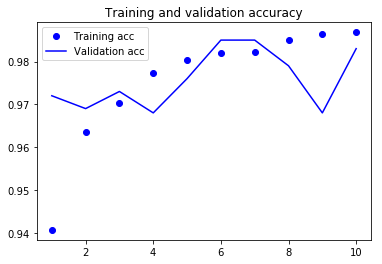

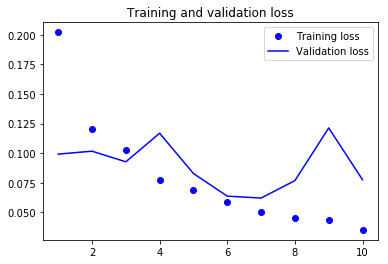

In [49]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

#### Assuming that things go well, you need to make three key choices to build your first working model:
1. Last-layer activation — This establishes useful constraints on the network’s output. For instance, the breast cancer classification example used sigmoid in the last layer.
2. Loss function — This should match the type of problem you’re trying to solve. For instance, the MNIST classification on Chapter 12 used logistic regression.  Loss functions, after all, need to be computable
given only a mini-batch of data (ideally, a loss function should be computable for as little as a single data point) and must be differentiable (otherwise, you can’t use backpropagation to train your network).
3. Optimization configuration — What optimizer will you use? What will its learning rate be? In most cases, **it’s safe to go with rmsprop and its default learning rate**. We have been investigating GD and SGD.

## Homework 1:
Lista 3 - Primeira questão.

### You still need to carry about: **Regularizing your model and tuning your hyperparameters**
1. Add dropout.
2. Try different architectures: add or remove layers.
3. Add L1 and/or L2 regularization.
4. Try different hyperparameters (such as the number of units per layer or the learning rate of the optimizer) to find the optimal configuration.
5. Optionally, iterate on feature engineering: add new features, or remove features that don’t seem to be informative.

## Data augmentation
Data augmentation takes the approach of generating more training data from existing training samples, by augmenting the samples via a number of random transformations that yield believable-looking images. The goal is that at training time, your model will never see the exact same picture twice. This helps expose the model to more aspects of the data and generalize better.  In Keras, this can be done by configuring a number of random transformations to be performed on the images read by the ImageDataGenerator instance.

In [16]:
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

datagen = ImageDataGenerator(
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')

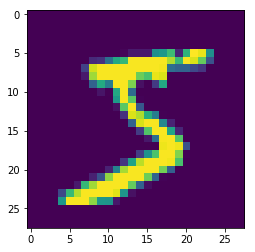

In [30]:
imgplot = plt.imshow(image.array_to_img(X_train[0]))
plt.show()

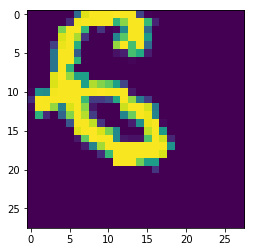

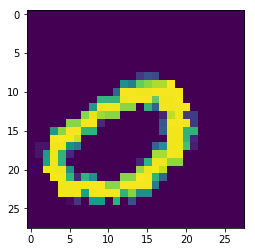

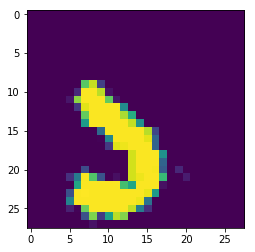

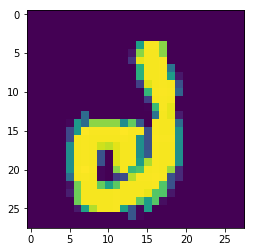

In [31]:
for batch in datagen.flow(X_train, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

## Dropout
As such, this may not be enough to completely get rid of overfitting. To further fight overfitting, you’ll add a Dropout layer to your model, right before the densely connected classifier

In [50]:
model = models.Sequential()
model.add(layers.Conv2D(filters= 32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1))) #(image_height, image_width, image_channels) (not including the batch dimension).
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(filters = 64, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(filters = 64, kernel_size=(3, 3), activation='relu'))
model.add(layers.Flatten()) # Output_shape=(None, 3*3*64)
model.add(layers.Dropout(0.5))
model.add(layers.Dense(units= 64, activation='relu'))
model.add(layers.Dense(units=10, activation='softmax'))

In [51]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_3 (Flatten)          (None, 576)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 576)               0         
__________

In [52]:
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [57]:
train_datagen = ImageDataGenerator(
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,)

history = model.fit_generator(datagen.flow(X_train, X_train_labels, batch_size=12), epochs=5, validation_data=(X_valid, X_valid_labels))
#Generate batches of tensor image data with real-time data augmentation. (6000/12 = 500)

Epoch 1/5
500/500 [==============================] - 12s 23ms/step - loss: 1.0451 - acc: 0.6537 - val_loss: 0.4711 - val_acc: 0.8200

In [58]:
test_loss, test_acc = model.evaluate(X_test, X_test_labels)
test_acc

1000/1000 [==============================] - 0s 440us/step


0.849

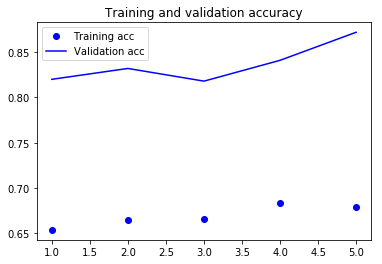

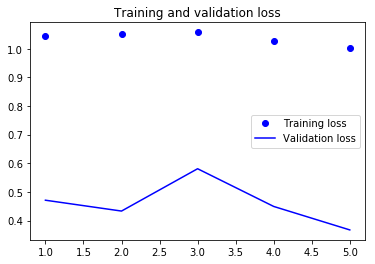

In [59]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## Homework 2:
Lista 3 - Segunda questão.